## **Building and Visualizing Word Frequencies**

In this notebook, we will look upon *build_freqs()* helper function we have defined in our *utils.py* file, and visualize the data fed into it. This function will help us to build a dictionary which will contain the number of times a word appears in the lists of positive and negative tweets. This will help us extracting the features of the dataset.

Let's start.

### **Setup**

Import the required libraries.

In [16]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np

We will also import our helper functions from our *utils.py* file.

In [17]:
! cp '/content/drive/My Drive/Colab Notebooks/utils.py' '/content'

In [18]:
from utils import process_tweet, build_freqs

Download the stopwords from NLTK as well.

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### **Load the NLTK Twitter sample dataset**

In [20]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [21]:
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')

In [22]:
# concatenate two lists
tweets = pos_tweets + neg_tweets
print('Number of tweets:', len(tweets))

Number of tweets: 10000


Next, we will build a **labels array** (numpy array) that matches the sentiments of our tweets. This array will be composed of 10000 elements. The first 5000 will be filled with 1 labels denoting positive sentiments, and the next 5000 will be 0 labels denoting the opposite. 

In [23]:
# make a numpy array representing labels of the tweets
labels = np.append(np.ones(len(pos_tweets)),
                   np.zeros(len(neg_tweets)))
print(labels)

[1. 1. 1. ... 0. 0. 0.]


### **Word Frequency Dictionary**

We will use the **build_freqs()** function from our **utils.py** file. This dictionary contains the word counts from both corpus - positive tweets, and negative tweets.

In [24]:
# create frequency dictionary
freqs = build_freqs(tweets, labels)

In [25]:
# check data type
print(f'type(freqs) = {type(freqs)}')

type(freqs) = <class 'dict'>


In [26]:
# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

len(freqs) = 13076


In [28]:
# print the frequency of each word depending on its class
for i, key in enumerate(freqs.keys()):
  print(key, ':', freqs[key])

  if i > 20:  break

('followfriday', 1.0) : 25
('top', 1.0) : 32
('engag', 1.0) : 7
('member', 1.0) : 16
('commun', 1.0) : 33
('week', 1.0) : 83
(':)', 1.0) : 3568
('hey', 1.0) : 76
('jame', 1.0) : 7
('odd', 1.0) : 2
(':/', 1.0) : 5
('pleas', 1.0) : 97
('call', 1.0) : 37
('contact', 1.0) : 7
('centr', 1.0) : 2
('02392441234', 1.0) : 1
('abl', 1.0) : 8
('assist', 1.0) : 1
('mani', 1.0) : 33
('thank', 1.0) : 620
('listen', 1.0) : 16
('last', 1.0) : 47


This looks okay, but we can do better!

It would be better to visualize this output in a more insightful way.

i.e., in the form of a **feature (**[*word, sum(positive frequencies), sum(negative frequencies)*]**)** for each tweet.

**Sum Positive Frequencies**: Sum of number of times a word appears in Positive Tweets.

**Sum Negative Frequencies**: Sum of number of times a word appears in Negative Tweets.

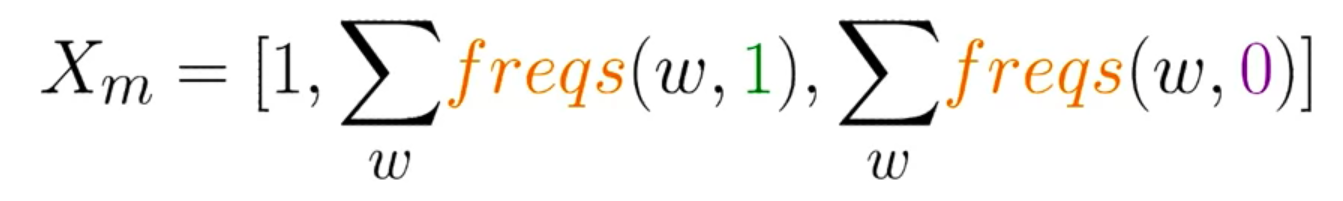

In [32]:
#@title
from IPython.display import Image
Image('/content/drive/My Drive/Colab Notebooks/feature_extraction_with_frequencies.png')

We will select a random set of words from our tweets dataset and try to visualize them.
We will store this information in a temporary list in case we need it later.

In [33]:
# Select some random words.
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

In [34]:
# loop through these words
data = []

for word in keys:
  # initialize positive and negative counts
  pos_count = 0
  neg_count = 0

  # retrieve the positive count
  if (word, 1) in freqs:
    pos_count = freqs[word, 1]
  
  # retrieve the negative count
  if (word, 0) in freqs:
    neg_count = freqs[word, 0]

  # append the counts to the list
  data.append([word, pos_count, neg_count])

data

[['happi', 211, 25],
 ['merri', 1, 0],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

We will now visualize these counts using a **scatter plot**. Instead of plotting the actual counts, we will plot their *logarithmic* values as the actual counts have very low counts (2 in the negative) as well as very high counts (3568 in the positive). 

The <font color='red'>**red line**</font> marks the boundary between positive and negative classes. Words close to the red line could be considered as neutral.



In [56]:
# convert positive and negative counts to logarithmic values
# We can add 1 to avoid log(0), just in case

x = np.log([i[1] + 1 for i in data])
y = np.log([i[2] + 1 for i in data])

In [57]:
x

array([5.35658627, 0.69314718, 4.59511985, 5.47646355, 2.94443898,
       1.79175947, 1.60943791, 4.18965474, 3.04452244, 3.40119738,
       8.18004072, 0.69314718, 0.69314718, 0.        , 1.79175947,
       1.09861229, 0.        , 3.13549422, 3.29583687, 2.07944154,
       3.8501476 , 1.09861229])

In [58]:
y

array([3.25809654, 0.        , 2.99573227, 4.62497281, 4.30406509,
       4.82028157, 2.48490665, 3.13549422, 2.77258872, 3.09104245,
       1.09861229, 8.42770602, 1.38629436, 1.09861229, 0.69314718,
       0.69314718, 5.35185813, 3.33220451, 2.39789527, 1.94591015,
       3.8918203 , 0.        ])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0, flags=flags)


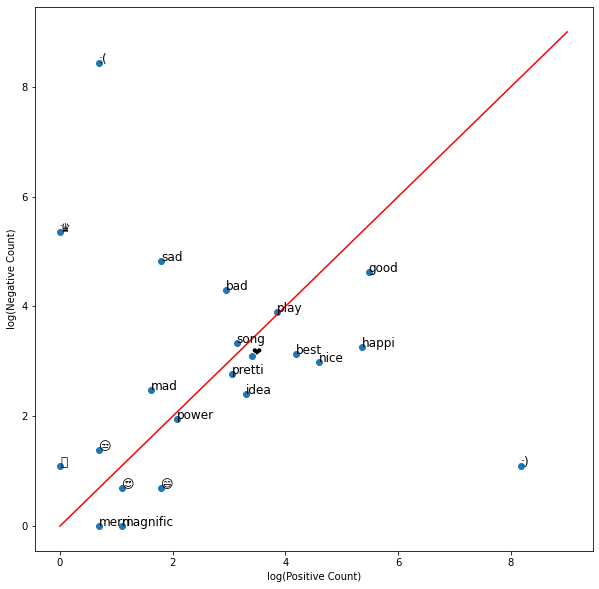

In [64]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))

# Plot a dot for each pair of words
ax.scatter(x, y)

# Assign axis labels
plt.xlabel('log(Positive Count)')
plt.ylabel('log(Negative Count)')

# Add the word as label to the points
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color='red')
plt.show()

The chart shows that emoticons :) and :( are very important for sentiment analysis. Thus, we should not let preprocessing steps get rid of these symbols!